# AppName eta importatu
Import the necessary libraries, including PySpark and matplotlib for plotting.

In [3]:
# Import the necessary libraries
from pyspark import SparkContext
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Initialize Spark session and context
spark = SparkSession.builder.appName("PySpark 101 Exercises").getOrCreate()
sc = spark.sparkContext

24/11/05 08:02:29 WARN Utils: Your hostname, aldatzeko resolves to a loopback address: 127.0.1.1; using 192.168.121.43 instead (on interface enp1s0)
24/11/05 08:02:29 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/11/05 08:02:30 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/11/05 08:02:31 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


# Irakurri Data
Irakurri data HDFS-tik at 192.168.85.2 /endomondoHR.json PySpark erabiltzen

In [11]:
# Irakurri Data
# Irakurri data from HDFS located at 192.168.85.2 /endomondoHR.json PySpark erabiltzen

# Define the HDFS path
hdfs_path = "hdfs://192.168.85.2:9000/endomondoHR.json"

# Json-a pasatu dataframe-era
df = spark.read.json(hdfs_path)

# Erakutsi lehenengo lerroak
df.show()

+--------------------+------+--------------------+---------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------+
|            altitude|gender|          heart_rate|       id|            latitude|           longitude|               speed|           sport|           timestamp|                 url|  userId|
+--------------------+------+--------------------+---------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------+
|[41.6, 40.6, 40.6...|  male|[100, 111, 120, 1...|396826535|[60.1733487658202...|[24.6497704088687...|[6.8652, 16.4736,...|            bike|[1408898746, 1408...|https://www.endom...|10921915|
|[38.4, 39.0, 39.0...|  male|[100, 105, 111, 1...|392337038|[60.1732475962489...|[24.6498552337288...|[9.0792, 13.284, ...|            bike|[1408221682, 1408...|https://www.endom...|10921915|
|[76.4, 73.2, 72.4...|  male|[99, 105, 1

# Erakutsi Data Schema
Erakutsi data schema printSchema() metodoarekin.

In [13]:
# Erakutsi Data Schema
# Erakutsi the schema of the data erabiltzen printSchema() metodoa

# Bistaratu DataFrame schema
df.printSchema()

root
 |-- altitude: array (nullable = true)
 |    |-- element: double (containsNull = true)
 |-- gender: string (nullable = true)
 |-- heart_rate: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- id: long (nullable = true)
 |-- latitude: array (nullable = true)
 |    |-- element: double (containsNull = true)
 |-- longitude: array (nullable = true)
 |    |-- element: double (containsNull = true)
 |-- speed: array (nullable = true)
 |    |-- element: double (containsNull = true)
 |-- sport: string (nullable = true)
 |-- timestamp: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- url: string (nullable = true)
 |-- userId: long (nullable = true)



# Gehitu zutabe bat NULL huts kopuruarekin

Zutabe berri bat gehitu, lerro bakoitzean balio nuluen kopurua zenbatuko duena.

In [15]:
from pyspark.sql.functions import col, when
from functools import reduce

# Add Column for Null Values Count
# Sortu "huts_kopurua" zutabe berri bat, lerro bakoitzeko balio nuluen kopurua zenbatuko duena 
# Zutabe bakoitzean balio nuluak egiaztatzen dituzten zerrenda bat sortzen du.
# (lambda a, b: a + b, [...]): Adierazpen horiek batu egiten ditu lerro bakoitzeko balio nuluen kopurua.
'''
DataFrameko zutabe guztien gainean iteratzen du, zutabe bakoitzean balio nuluekin zerrenda bat sortzen du,
eta 1. itzulketa egiten du, baliogabea bada edo ez bada 0, eta gero balioak gehitzen dituen lambda funtzioa erabiltzen du reduce() erabiliz, 
lerro bakoitzeko balio nuluen kopurua zenbatuz eta zenbaketa hori huts_kopurua izeneko zutabe berri gehituz DataFrameari.
'''
df = df.withColumn('huts_kopurua', reduce(lambda a, b: a + b, [when(col(c).isNull(), 1).otherwise(0) for c in df.columns]))

# Show
df.show()

+--------------------+------+--------------------+---------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------+------------+
|            altitude|gender|          heart_rate|       id|            latitude|           longitude|               speed|           sport|           timestamp|                 url|  userId|huts_kopurua|
+--------------------+------+--------------------+---------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------+------------+
|[41.6, 40.6, 40.6...|  male|[100, 111, 120, 1...|396826535|[60.1733487658202...|[24.6497704088687...|[6.8652, 16.4736,...|            bike|[1408898746, 1408...|https://www.endom...|10921915|           0|
|[38.4, 39.0, 39.0...|  male|[100, 105, 111, 1...|392337038|[60.1732475962489...|[24.6498552337288...|[9.0792, 13.284, ...|            bike|[1408221682, 1408...|https://www.endom..

# Kirol bakoitzeko dautak pilakatu eta kontatu, alegia zenbat dauden azaldu

Bildu datuak kirolaren arabera eta zenbatu kirol bakoitzaren sarrera kopurua.

In [26]:
from pyspark.sql.functions import col

#Bildu datuak "sport" zutabearen arabera eta zenbatu kirol bakoitzeko sarrera kopurua
sport_count_df = df.groupBy("sport").count()
#sport_count_df = df.groupBy("sport").count().orderBy(col("count").desc())

# Show data
sport_count_df.show()

[Stage 20:======================================================> (48 + 1) / 49]

+--------------------+------+
|               sport| count|
+--------------------+------+
|       mountain bike| 13510|
|cross-country skiing|   949|
|              hiking|   357|
|            kayaking|   255|
|        orienteering|  1197|
|              rowing|   127|
|    bike (transport)| 10445|
|      indoor cycling|  2606|
|                walk|  3831|
|               skate|   512|
|                 run|117902|
|core stability tr...|  1262|
|              tennis|     8|
|                bike| 98001|
|     weight training|   237|
|       stair climing|    13|
|          elliptical|    83|
|              soccer|    71|
|   treadmill running|    70|
|    circuit training|   218|
+--------------------+------+
only showing top 20 rows



# (extra) 5 kirol praktikatuenak (gehien praktikatzen dutenak) erakutsi grafika batean
Plot the top 5 most practiced sports using matplotlib.

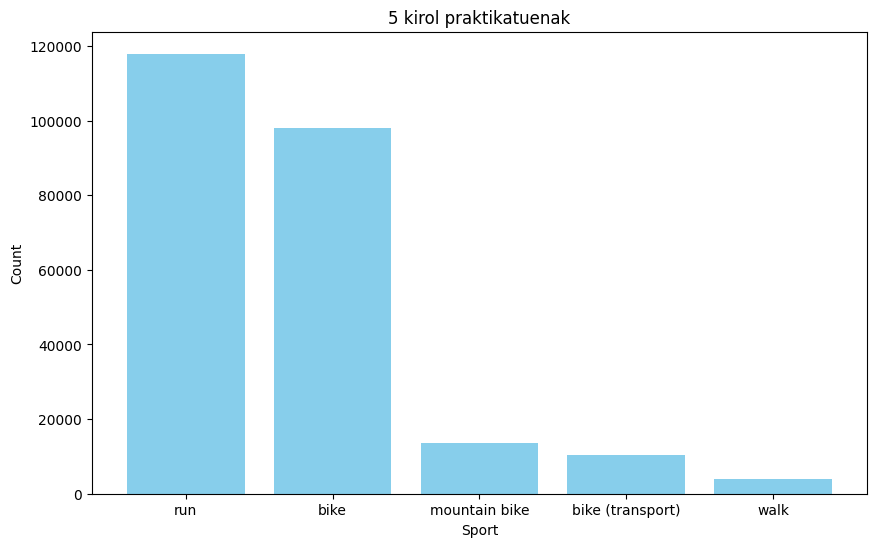

<Axes: xlabel='sport'>

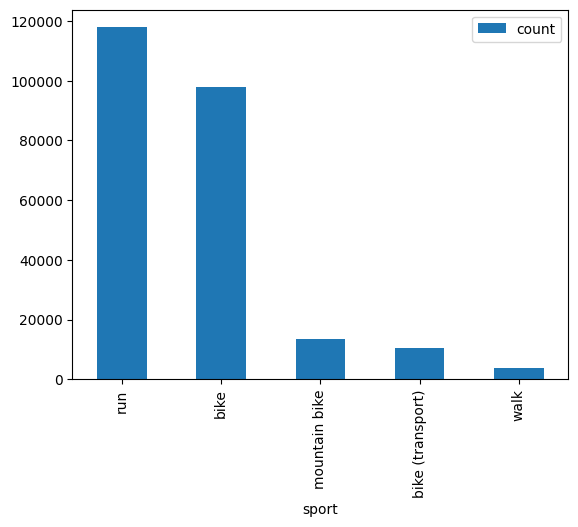

In [32]:
# Grafikoa
# Import necessary libraries for plotting
import matplotlib.pyplot as plt

# 5 praktikatzen diren gehien kiroal ordenatu eta atera lehenengo 5-ak
top_5_sports_df = sport_count_df.orderBy(col("count").desc()).limit(5)
# Collect data
top_5_sports = top_5_sports_df.collect()

# Extract sports and counts plt grafikoari pasatzeko
sports = [row['sport'] for row in top_5_sports]
counts = [row['count'] for row in top_5_sports]

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(sports, counts, color='skyblue')
plt.xlabel('Sport')
plt.ylabel('Count')
plt.title('5 kirol praktikatuenak')
plt.show()

top_5_sports_df = top_5_sports_df.toPandas()
top_5_sports_df.plot(kind='bar', x='sport', y='count')